<a href="https://colab.research.google.com/github/arrizaldi/AICourseAssignment/blob/main/FinalAssignment_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat"
columns = ['Frequency', 'Angle_of_Attack', 'Chord_Length', 'Free_Stream_Velocity', 'Suction_Displacement_Thickness', 'Scaled_Sound_Pressure_Level']
data = pd.read_csv(url, sep="\t", header=None, names=columns)

# Preview dataset
print(data.head())

   Frequency  Angle_of_Attack  Chord_Length  Free_Stream_Velocity  \
0        800              0.0        0.3048                  71.3   
1       1000              0.0        0.3048                  71.3   
2       1250              0.0        0.3048                  71.3   
3       1600              0.0        0.3048                  71.3   
4       2000              0.0        0.3048                  71.3   

   Suction_Displacement_Thickness  Scaled_Sound_Pressure_Level  
0                        0.002663                      126.201  
1                        0.002663                      125.201  
2                        0.002663                      125.951  
3                        0.002663                      127.591  
4                        0.002663                      127.461  


In [ ]:
# Separate features and target
X = data.drop(columns="Scaled_Sound_Pressure_Level")
y = data["Scaled_Sound_Pressure_Level"]

In [ ]:
# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Define the model
model = RandomForestRegressor(random_state=42)

In [ ]:
# ============================================
# 1. Hold-Out Validation
# ============================================
start_holdout = time.time()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
holdout_rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # RMSE for Hold-Out
holdout_r2 = r2_score(y_test, y_pred)  # R² for Hold-Out
holdout_compTime = time.time() - start_holdout


In [ ]:
# Analyze the effect of number of splits on k-Fold Cross Validation
n_splits_range = list(range(5, 151, 10))
kf_mean_rmse_list = []
kf_std_rmse_list = []
kf_mean_r2_list = []
kf_computation_time_list = []

# Recalculate metrics and computation time
for num_splits in n_splits_range:
    start_time = time.time()  # Start timing
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)
    kf_rmse_list = []  # RMSE values for each fold
    kf_r2_list = []    # R² values for each fold

    for train_index, val_index in kf.split(X):
        # Split data
        X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
        y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

        # Train model
        model.fit(X_train_fold, y_train_fold)
        y_pred_fold = model.predict(X_val_fold)

        # Calculate metrics
        fold_rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred_fold))
        fold_r2 = r2_score(y_val_fold, y_pred_fold)
        kf_rmse_list.append(fold_rmse)
        kf_r2_list.append(fold_r2)

    # Store metrics for current n_splits
    kf_mean_rmse_list.append(np.mean(kf_rmse_list))
    kf_std_rmse_list.append(np.std(kf_rmse_list))
    kf_mean_r2_list.append(np.mean(kf_r2_list))
    kf_computation_time_list.append(time.time() - start_time)  # Time taken for the process


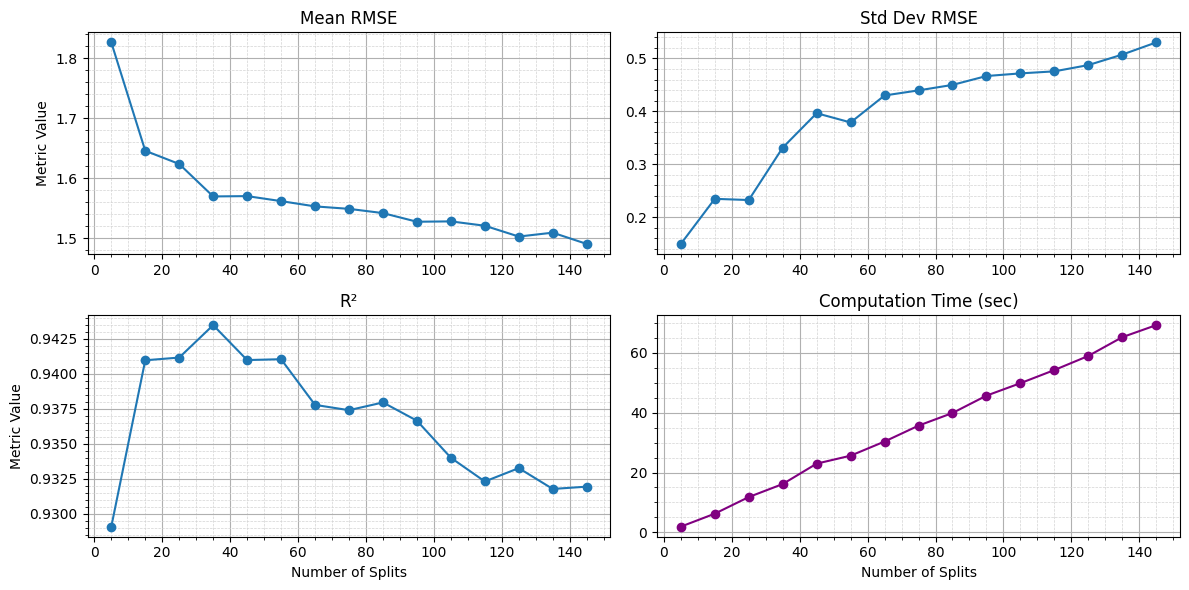

In [ ]:
plt.figure(figsize=(12, 6))

# Metrics plot
plt.subplot(2, 2, 1)
plt.plot(n_splits_range, kf_mean_rmse_list, marker='o', label='Mean RMSE')
plt.title('Mean RMSE')
#plt.xlabel('Number of Splits')
plt.ylabel('Metric Value')
plt.minorticks_on()
plt.grid(True)
plt.grid(which='minor', color='lightgray', linestyle='--', linewidth=0.5)

plt.subplot(2, 2, 2)
plt.plot(n_splits_range, kf_std_rmse_list, marker='o', label='RMSE Std Dev')
plt.title('Std Dev RMSE')
#plt.xlabel('Number of Splits')
plt.minorticks_on()
plt.grid(True)
plt.grid(which='minor', color='lightgray', linestyle='--', linewidth=0.5)

plt.subplot(2, 2, 3)
plt.plot(n_splits_range, kf_mean_r2_list, marker='o', label='Mean R²')
plt.xlabel('Number of Splits')
plt.ylabel('Metric Value')
plt.title('R²')
plt.minorticks_on()
plt.grid(True)
plt.grid(which='minor', color='lightgray', linestyle='--', linewidth=0.5)

# Computation time plot
plt.subplot(2, 2, 4)
plt.plot(n_splits_range, kf_computation_time_list, marker='o', color='purple', label='Computation Time')
plt.title('Computation Time (sec)')
plt.xlabel('Number of Splits')
plt.minorticks_on()
plt.grid(True)
plt.grid(which='minor', color='lightgray', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

In [ ]:
# Analyze the effect of number of splits on k-Fold Cross Validation
n_iterations_list = list(range(10, 200, 10))
bs_mean_rmse_list = []
bs_std_rmse_list = []
bs_mean_r2_list = []
bs_computation_time_list = []

# Recalculate metrics and computation time
for n_iterations in n_iterations_list:
    start_time = time.time()  # Start timing
    bs_rmse_list = []  # RMSE values for each fold
    bs_r2_list = []    # R² values for each fold

    for _ in range(n_iterations):
        bs_indices = np.random.choice(len(X), size=len(X), replace=True)
        X_bs, y_bs = X.iloc[bs_indices], y.iloc[bs_indices]

        model.fit(X_bs, y_bs)
        y_pred_bs = model.predict(X)

        bs_rmse = np.sqrt(mean_squared_error(y, y_pred_bs))
        bs_rmse_list.append(bs_rmse)

        bs_r2 = r2_score(y, y_pred_bs)
        bs_r2_list.append(bs_r2)

    # Store metrics for current n_iterations
    bs_mean_rmse_list.append(np.mean(bs_rmse_list))
    bs_std_rmse_list.append(np.std(bs_rmse_list))
    bs_mean_r2_list.append(np.mean(bs_r2_list))
    bs_computation_time_list.append(time.time() - start_time)  # Time taken for the process

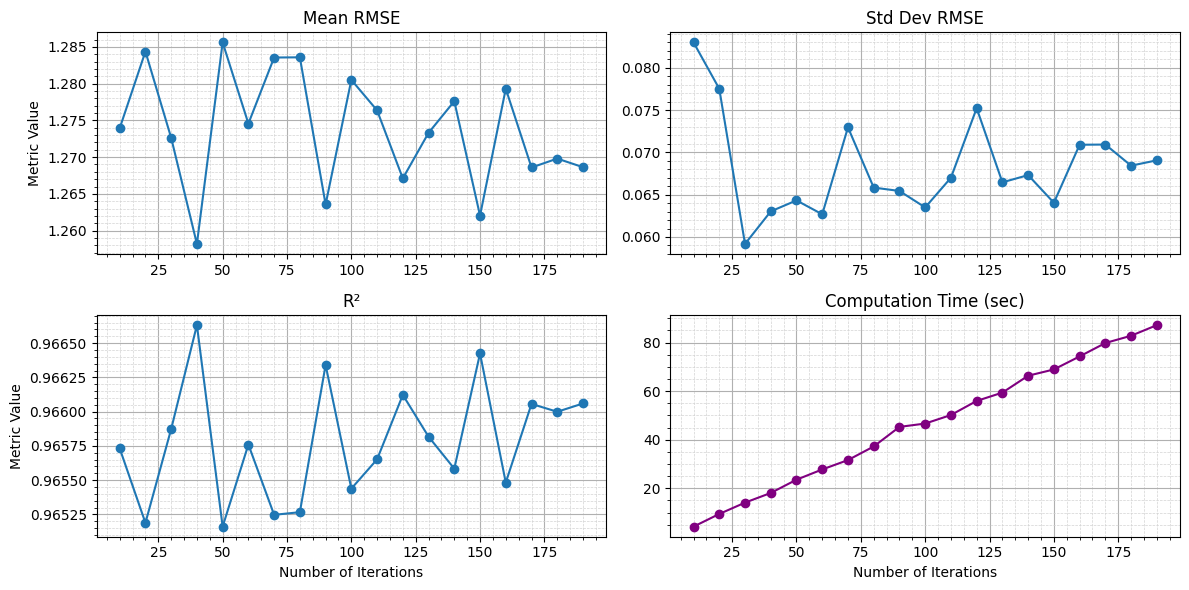

In [ ]:
plt.figure(figsize=(12, 6))

# Metrics plot
plt.subplot(2, 2, 1)
plt.plot(n_iterations_list, bs_mean_rmse_list, marker='o', label='Mean RMSE')
plt.title('Mean RMSE')
plt.ylabel('Metric Value')
plt.minorticks_on()
plt.grid(True)
plt.grid(which='minor', color='lightgray', linestyle='--', linewidth=0.5)

plt.subplot(2, 2, 2)
plt.plot(n_iterations_list, bs_std_rmse_list, marker='o', label='RMSE Std Dev')
plt.title('Std Dev RMSE')
plt.minorticks_on()
plt.grid(True)
plt.grid(which='minor', color='lightgray', linestyle='--', linewidth=0.5)

plt.subplot(2, 2, 3)
plt.plot(n_iterations_list, bs_mean_r2_list, marker='o', label='Mean R²')
plt.xlabel('Number of Iterations')
plt.ylabel('Metric Value')
plt.title('R²')
plt.minorticks_on()
plt.grid(True)
plt.grid(which='minor', color='lightgray', linestyle='--', linewidth=0.5)

# Computation time plot
plt.subplot(2, 2, 4)
plt.plot(n_iterations_list, bs_computation_time_list, marker='o', color='purple', label='Computation Time')
plt.title('Computation Time (sec)')
plt.xlabel('Number of Iterations')
plt.minorticks_on()
plt.grid(True)
plt.grid(which='minor', color='lightgray', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

In [ ]:
# ============================================
# 2. k-Fold Cross-Validation
# ============================================
kf = KFold(n_splits=35, shuffle=True, random_state=42)
kf_rmse_list = []  # List to store RMSE values for each fold
kf_r2_list = []    # List to store R² values for each fold
start_kf = time.time()

for train_index, val_index in kf.split(X):
    # Use iloc to index into the DataFrame
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    model.fit(X_train_fold, y_train_fold)
    y_pred_fold = model.predict(X_val_fold)

    fold_rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred_fold))
    kf_rmse_list.append(fold_rmse)

    fold_r2 = r2_score(y_val_fold, y_pred_fold)
    kf_r2_list.append(fold_r2)

kf_mean_rmse = np.mean(kf_rmse_list)  # Average RMSE across all folds
kf_std_rmse = np.std(kf_rmse_list)    # Standard deviation of RMSE across folds
kf_mean_r2 = np.mean(kf_r2_list)      # Average R² across all folds
kf_compTime = time.time() - start_kf


In [ ]:
# ============================================
# 3. Bootstrapping
# ============================================
n_iterations = 40  # Number of bootstrap samples
bootstrap_rmse_list = []  # List to store RMSE values for each bootstrap sample
bootstrap_r2_list = []    # List to store R² values for each bootstrap sample
start_bs = time.time()

for _ in range(n_iterations):
    bootstrap_indices = np.random.choice(len(X), size=len(X), replace=True)
    X_bootstrap, y_bootstrap = X.iloc[bootstrap_indices], y.iloc[bootstrap_indices]

    model.fit(X_bootstrap, y_bootstrap)
    y_pred_bootstrap = model.predict(X)

    bootstrap_rmse = np.sqrt(mean_squared_error(y, y_pred_bootstrap))
    bootstrap_rmse_list.append(bootstrap_rmse)

    bootstrap_r2 = r2_score(y, y_pred_bootstrap)
    bootstrap_r2_list.append(bootstrap_r2)

bootstrap_mean_rmse = np.mean(bootstrap_rmse_list)
bootstrap_std_rmse = np.std(bootstrap_rmse_list)
bootstrap_mean_r2 = np.mean(bootstrap_r2_list)
bootstrap_compTime = time.time() - start_bs


In [ ]:
# ============================================
# 4. Print Results
# ============================================

print(f"Hold-Out RMSE: {holdout_rmse:.4f}")
print(f"Hold-Out R²: {holdout_r2:.4f}")
print(f"Hold-Out Comp. Time: {holdout_compTime:.4f}")
print()
print(f"k-Fold Cross-Validation RMSE: {kf_mean_rmse:.4f} ± {kf_std_rmse:.4f}")
print(f"k-Fold Cross-Validation R²: {kf_mean_r2:.4f}")
print(f"k-Fold Cross-Validation Comp. Time: {kf_compTime:.4f}")
print()
print(f"Bootstrapping RMSE: {bootstrap_mean_rmse:.4f} ± {bootstrap_std_rmse:.4f}")
print(f"Bootstrapping R²: {bootstrap_mean_r2:.4f}")
print(f"Bootstrapping Comp. Time: {bootstrap_compTime:.4f}")
print()


Hold-Out RMSE: 1.8561
Hold-Out R²: 0.9270
Hold-Out Comp. Time: 0.5972

k-Fold Cross-Validation RMSE: 1.5700 ± 0.3313
k-Fold Cross-Validation R²: 0.9435
k-Fold Cross-Validation Comp. Time: 16.5776

Bootstrapping RMSE: 1.2568 ± 0.0649
Bootstrapping R²: 0.9667
Bootstrapping Comp. Time: 18.4219

